# 0. Imports

## 0.1 Libs

In [1]:
import pandas   as pd
import numpy    as np
import seaborn  as sns
import warnings


from IPython.display  import Image
from matplotlib       import pyplot as plt


## 0.2 Helper Functions

In [2]:
warnings.simplefilter("ignore")

## 0.3 Loading data

In [3]:
df_raw = pd.read_csv('../data/kc_house_data.csv')

# 1. Data Description

## 1.0 Overview

In [4]:
df1 = df_raw.copy()
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

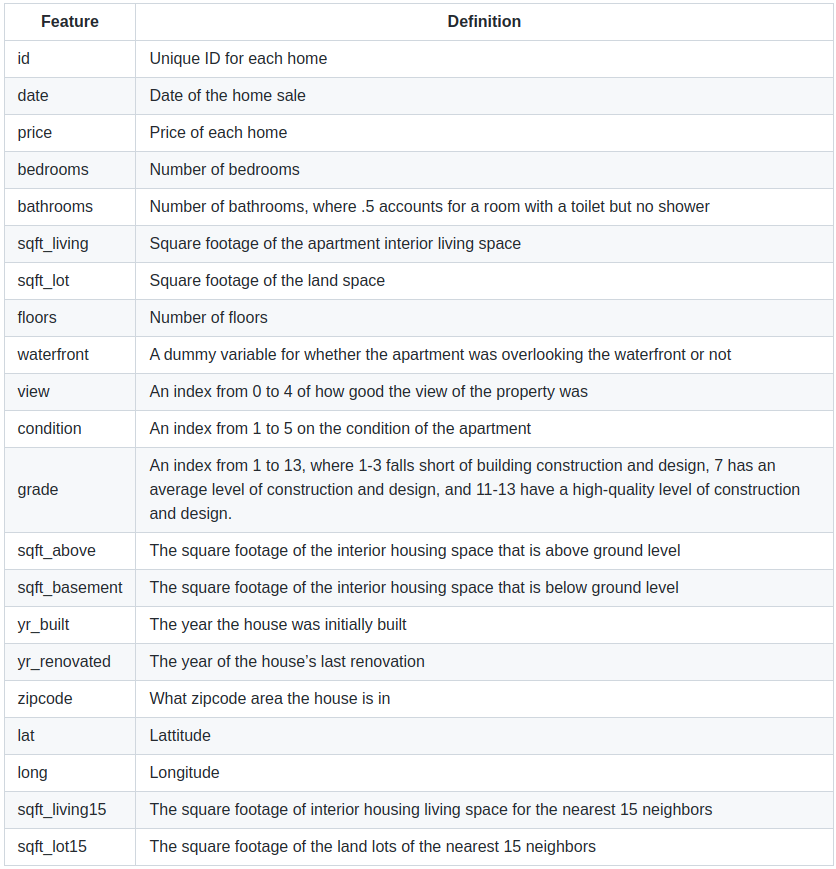

In [5]:
Image('../image/feature_definition.png')

## 1.1 Data Dimensions

In [6]:
print(f'Number of Rows:{df1.shape[0]}')
print(f'Number of Columns:{df1.shape[1]}')

Number of Rows:21613
Number of Columns:21


## 1.2 Data Types

In [7]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 1.2.1 Change Types

In [8]:
df1['date'] = pd.to_datetime(df1['date'])
df1['floors'] = df1['floors'].astype(int)

In [9]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3 Check and Fillout NA

In [10]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4 Data Descriptive

### 1.4.1 Defining Datasets

In [11]:
num_attributes = df1[['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]

cat_attributes = df1[['view', 'condition', 'waterfront',  'grade']]

### 1.4.2 Numerical Attributes

In [12]:
# Medidas de Tendência Central (média e mediana)
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Medidas de Dispersão (std, min, max, range, skew, kurtosis)
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenar
m = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

pd.set_option('float_format', '{:.2f}'.format)
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
1,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
2,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
3,floors,1.00,3.00,2.00,1.45,1.00,0.55,0.73,-0.55
4,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
6,sqft_above,290.00,9410.00,9120.00,1788.40,NaN,828.11,1.45,3.40
7,sqft_basement,0.00,4820.00,4820.00,291.51,0.00,442.56,1.58,2.72
8,yr_built,1900.00,2015.00,115.00,1971.01,1975.00,29.37,-0.47,-0.66
9,yr_renovated,0.00,2015.00,2015.00,84.40,0.00,401.67,4.55,18.70


### 1.4.2 Categorical Attributes

<AxesSubplot:xlabel='waterfront', ylabel='price'>

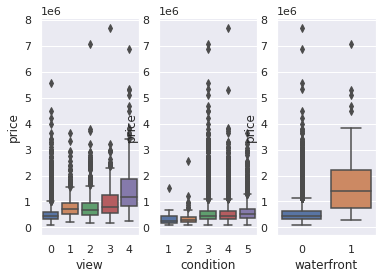

In [13]:
# aux1 = df1[(df1['price'] < 4000000 )]

sns.set(rc={'figure.figsize':(20,5)})

plt.subplot(1,3,1)
sns.boxplot(x='view', y='price', data=df1)

plt.subplot(1,3,2)
sns.boxplot(x='condition', y='price', data=df1)

plt.subplot(1,3,3)
sns.boxplot(x='waterfront', y='price', data=df1)

<AxesSubplot:xlabel='grade', ylabel='price'>

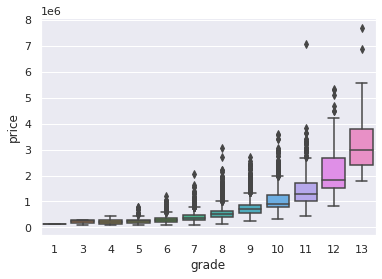

In [14]:
sns.boxplot(x='grade', y='price', data=df1)

# 2. Feature Engineering

## 2.1 Mind Map

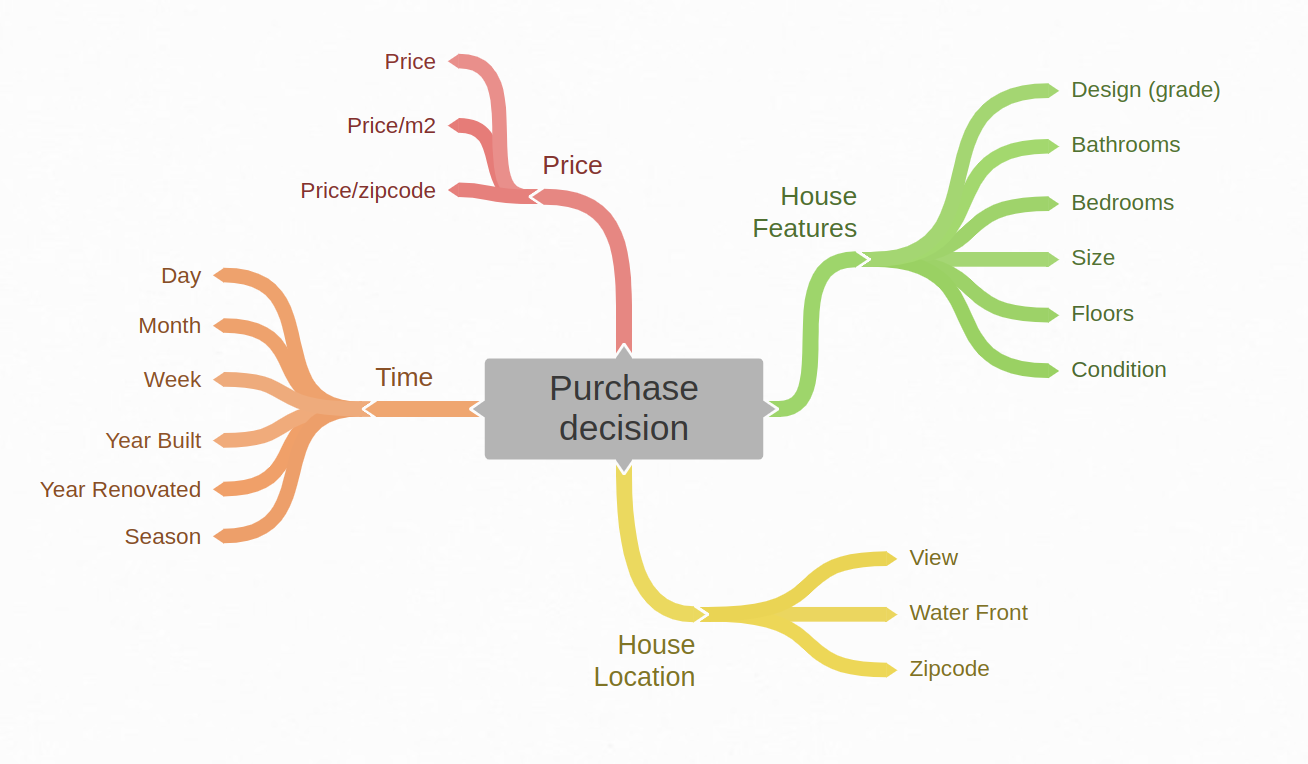

In [15]:
Image('../image/mind_map.png')

* H1: o crescimento do preço dos imóveis de 2014 para 2015 foi de 10%.
* H2: imóveis que possuem vista para água são 20% mais caros na média.
* H3: os imoveis com vista para a agua possuem uma área 50% maior que os demais.
* H4: imóveis sem porão possuem área total 40% maior que os imoveis com porão.
* H5: imóveis com 3 banheiros tiveram um crescimento de 15% ao mês (MoM)
* H6: imóveis que foram reformados e estão em boas condições são, em média, 20% mais caros que os não reformados nas mesmas condições.
* H7: imóveis em más condições são 20% mais baratos que imoveis em boas condições.
* H8: imóveis construídos depois dos anos 2000 possuem área total 20% menor que os demais.
* H9: imoveis construídos depois dos anos 2000 são 30% mais caros que os demais
* H10: imóveis construídos antes 1955 são 50% mais baratos na média.
* H11: a melhor época para vender é no verão.
* H12: Imóveis com design modernos (grade > 10) são 50% mais caros que os demais.



## 2.3 Feature Engineering

##### 2.3.1 Time-derived Features

In [16]:
df2 = df1.copy()

In [17]:
# Month:
df2['month'] = df2['date'].dt.month

# Year:
df2['year'] = df2['date'].dt.year

# Season:
for i in range(len(df2)):
  if (df2.loc[i, 'month'] <= 2 ) or (df2.loc[i, 'month'] == 12):
      df2.loc[i, 'season'] = 'winter'
  elif df2.loc[i, 'month'] <= 5:
      df2.loc[i, 'season'] = 'spring'
  elif df2.loc[i, 'month'] <= 8:
      df2.loc[i, 'season'] = 'summer'
  else:
      df2.loc[i, 'season'] = 'fall'


##### 2.3.2 Square feet to square meters area features

In [18]:
# sqft2 para m2:
df2['m2_lot']      = df2['sqft_lot'] / 10.764
df2['m2_living']   = df2['sqft_living'] / 10.764
df2['m2_above']    = df2['sqft_above'] / 10.764
df2['m2_basement'] = df2['sqft_basement'] / 10.764

# Price/m2:
df2['price_m2'] = df2['price'] / df2['m2_lot']

# Median Price/m2 by region:
df_temp1 = df2[['zipcode', 'price_m2']].groupby('zipcode').median().reset_index()
df_temp1 = df_temp1.rename(columns={'price_m2': 'median_price_m2_zipcode'})
df2 = pd.merge( df2, df_temp1, on='zipcode', how='inner')

##### 2.3.3 Features derived from clusters

In [19]:
# By property type:
df2['dormitory_type'] = 'NA'
for i in range( len( df2 ) ):
    if df2.loc[i, 'bedrooms'] <= 1:
      df2.loc[i, 'dormitory_type'] = 'studio'  
    elif df2.loc[i, 'bedrooms'] <= 2:
      df2.loc[i, 'dormitory_type'] = 'apartment'
    elif df2.loc[i, 'bedrooms'] <= 4:
      df2.loc[i, 'dormitory_type'] = 'house'
    else:
      df2.loc[i, 'dormitory_type'] = 'mansion'

# By price/m2:
df2['price_group'] = 'NA'
for i in range( len( df2 ) ):
    # price/m2 está acima da mediana da região
    if df2.loc[i, 'price_m2'] > df2.loc[i, 'median_price_m2_zipcode']:
      df2.loc[i, 'price_group'] = 'over_median'  
    # price/m2 está entre 75% e 100% da mediana da região
    elif df2.loc[i, 'price_m2'] >= df2.loc[i, 'median_price_m2_zipcode']*0.75:
      df2.loc[i, 'price_group'] = '75%_100%'
    # price/m2 está entre 50% e 75% da mediana da região
    elif df2.loc[i, 'price_m2'] >= df2.loc[i, 'median_price_m2_zipcode']*0.5:
      df2.loc[i, 'price_group'] = '50%_75%' 
    # price/m2 está entre 25% e 50% da mediana da região
    elif df2.loc[i, 'price_m2'] >= df2.loc[i, 'median_price_m2_zipcode']*0.25:
      df2.loc[i, 'price_group'] = '25%_50%'
    # price/m2 está entre 0% e 25% da mediana da região
    else:
      df2.loc[i, 'price_group'] = '0%_25%'

# By year built:
df2['house_age'] = 'NA'
for i in range( len( df2 ) ):
    if df2.loc[i, 'yr_built'] > 1990:
      df2.loc[i, 'house_age'] = '+90'
    elif df2.loc[i, 'yr_built'] > 1960:
      df2.loc[i, 'house_age'] = '60_90'
    else:
      df2.loc[i, 'house_age'] = '-60'


##### 2.3.4 Features derived from the sales strategy

In [20]:
# Better Season to Sell - feature with the best selling period by zipcode:
# Def.: made from the calculation of the median price/m2 by zipcode and by season of the year and then selecting the season that had the highest median.

df_temp2 = df2[['zipcode', 'season', 'price_m2']].groupby(['zipcode', 'season']).median().reset_index()

for i in range(len(df_temp2)):
  df_temp2.loc[i, 'concat'] = str(df_temp2.loc[i, 'zipcode']) + '_' + str(df_temp2.loc[i, 'price_m2'])

better_season = df_temp2[['zipcode', 'price_m2']].groupby('zipcode').max().reset_index()

for i in range(len(better_season)):
  better_season.loc[i, 'concat'] = str(better_season.loc[i, 'zipcode']) + '_' + str(better_season.loc[i, 'price_m2'])

better_season = pd.merge( better_season, df_temp2[['concat', 'season']], on='concat', how='inner')
better_season.columns = ['zipcode', 'max_median_price_m2_zipcode', 'concat', 'better_season_to_sell']
df2 = pd.merge (df2, better_season[['zipcode', 'better_season_to_sell', 'max_median_price_m2_zipcode']], on='zipcode', how='inner')


# Sale Price
# Def.: the sale price suggestion was built considering the positioning of the price/m2 in relation to the median of the region where the property is located.
for i in range(len(df2)):
    if (df2.loc[i, 'price_group'] == '0%_25%'):
        df2.loc[i, 'sale_price'] = df2.loc[i, 'price'] * 1.8
    elif (df2.loc[i, 'price_group'] == '25%_50%'):
        df2.loc[i, 'sale_price'] = df2.loc[i, 'price'] * 1.5
    elif (df2.loc[i, 'price_group'] == '50%_75%'):
        df2.loc[i, 'sale_price'] = df2.loc[i, 'price'] * 1.3
    else:
        df2.loc[i, 'sale_price'] = df2.loc[i, 'price'] * 1.2


# ROI
for i in range(len(df2)):
    df2.loc[i, 'roi_%'] = (df2.loc[i, 'sale_price'] / df2.loc[i, 'price'] -1) *100

# 3. Data Filtering

## 3.1 Rows filtering

In [21]:
df3 = df2.copy()

In [22]:
# Retirando imóvel com 33 quartos (registro incorreto)
df3 = df3[df3['bedrooms'] < 33]

# Retirando imóveis sem banheiro:
df3 = df3[df3['bathrooms'] > 1]

# Retirando casas acima de 4 milhões de dolares
df3 = df3[df3['price'] < 4000000]

## 3.2 Columns Filtering

In [23]:
# As colunas sqft_living15', 'sqft_lot15' não serão utilizadas nessa rodada de analise
# As colunas de área em sqft serão excluídas


cols_drop = ['sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'max_median_price_m2_zipcode']
df3 = df3.drop(cols_drop, axis=1)

# 4. Exploratory Data Analysis

## 4.1 Univariate Analysis

### 4.1.0 Defining datasets

In [24]:
df4 = df3.copy()

df4.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'month', 'year', 'season', 'm2_lot', 'm2_living',
       'm2_above', 'm2_basement', 'price_m2', 'median_price_m2_zipcode',
       'dormitory_type', 'price_group', 'house_age', 'better_season_to_sell',
       'sale_price', 'roi_%'],
      dtype='object')

In [25]:
num_attributes = df4[['price', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'yr_renovated', 'm2_lot', 'm2_living',
                      'm2_above', 'm2_basement', 'price_m2', 'zipcode',]]

cat_attributes = df4[['waterfront', 'view', 'condition', 'grade', 'season', 'dormitory_type', 
                      'price_group', 'house_age','better_season_to_sell']]


### 4.1.1 Numerical Attributes

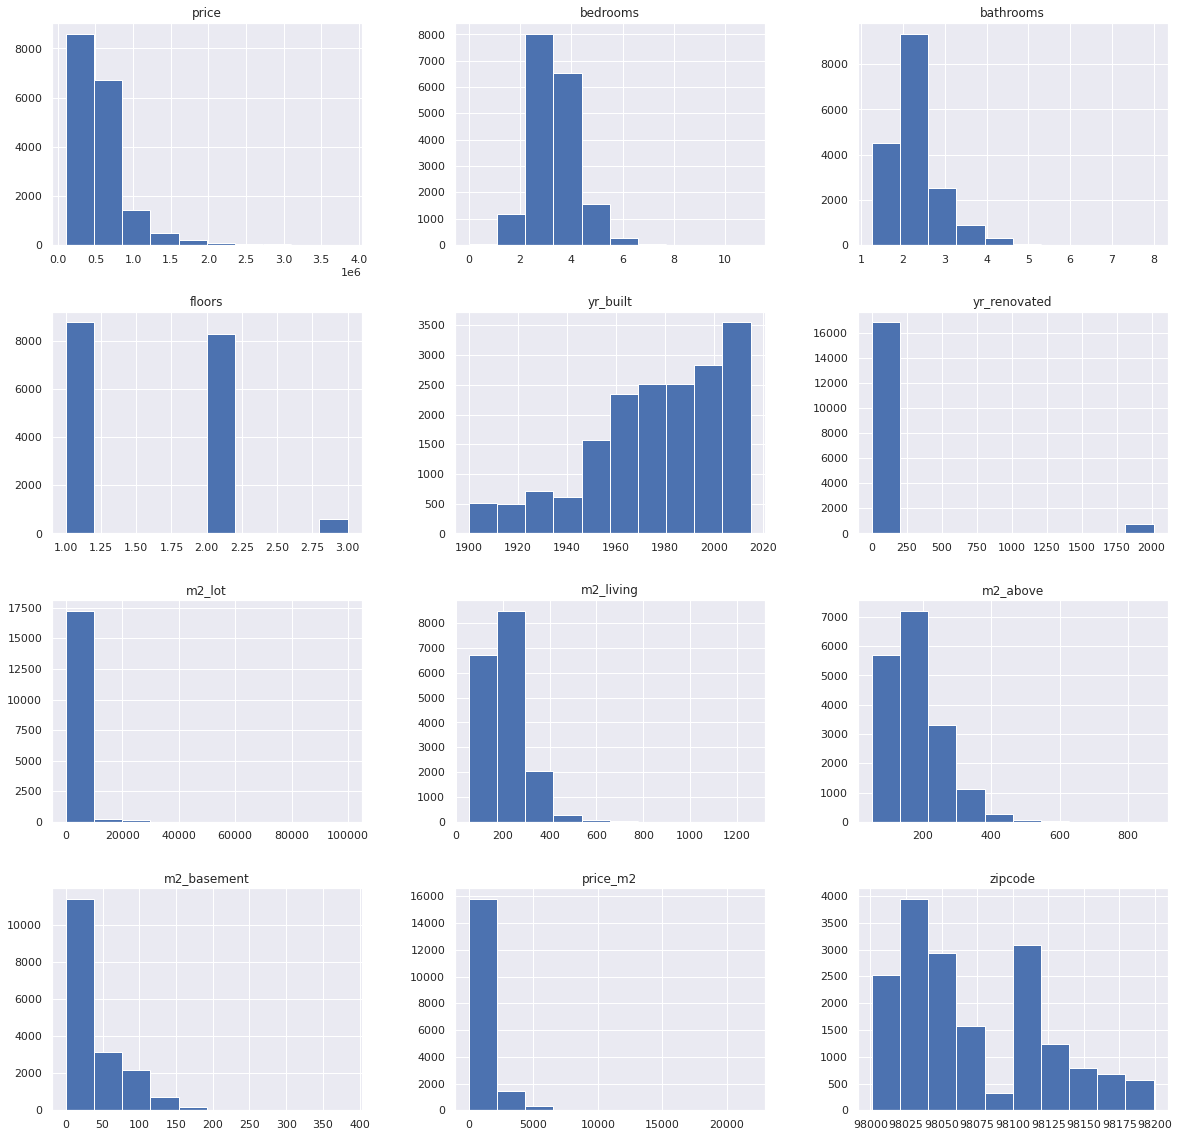

In [26]:
# Análise do portfólio total:
sns.set(rc={'figure.figsize':(20,20)})
num_attributes.hist();


### 4.1.2 Categorical Attributes

'waterfront', 'view', 'condition', 'grade', 'season', 'dormitory_type', 
'price_group', 'house_age', 'design', 'basement','better_season_to_sell']]

Excluir:
'house_age', 'design', 'basement'

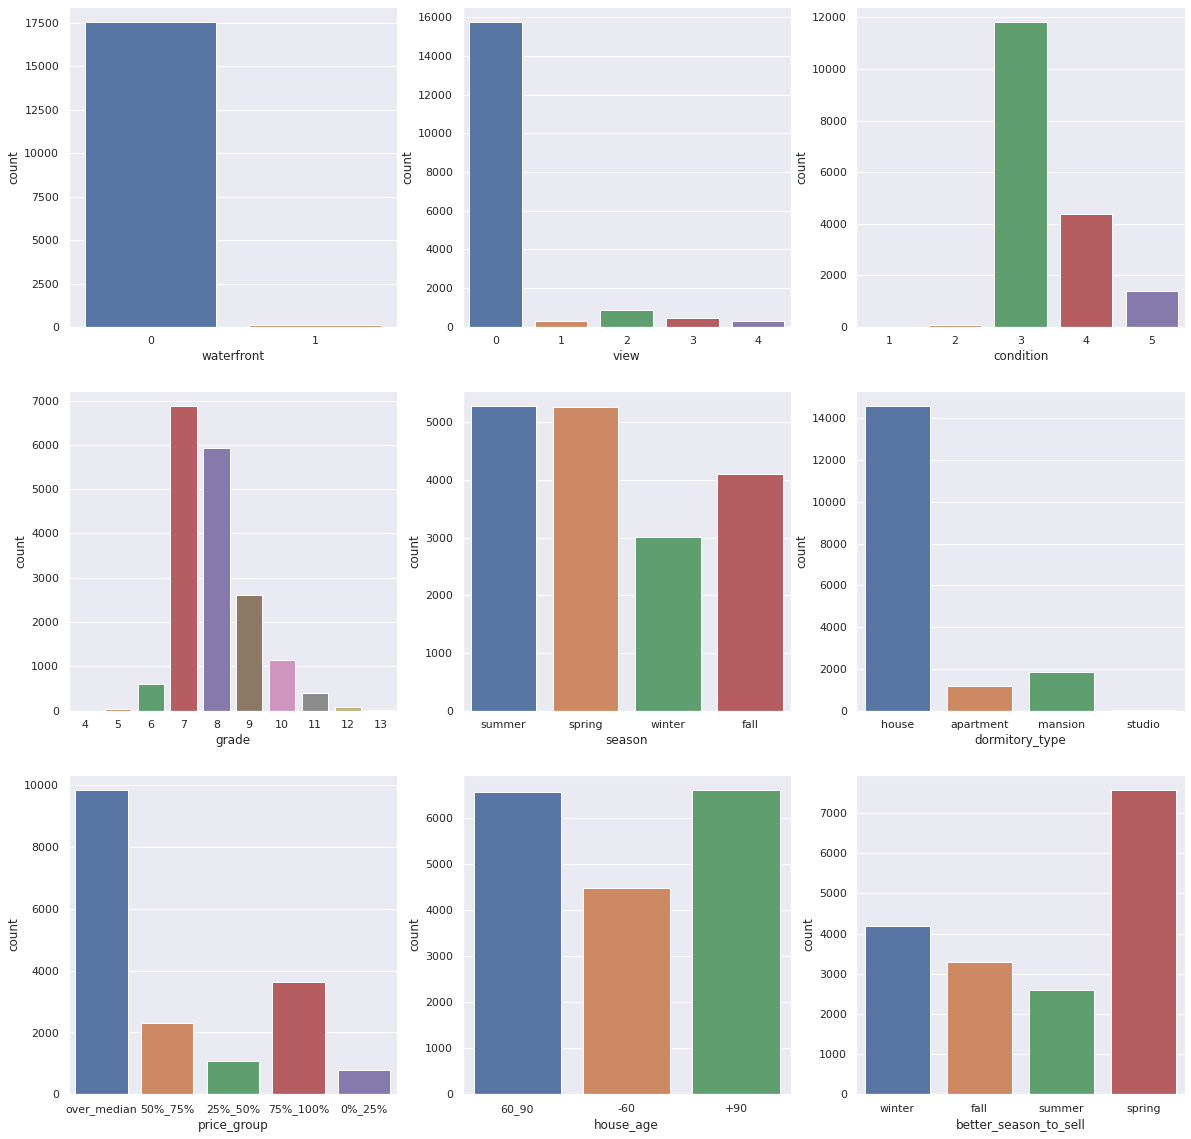

In [27]:
sns.set(rc={'figure.figsize':(20,20)})

# Water Front:
plt.subplot(3, 3, 1)
sns.countplot(cat_attributes['waterfront']);

# View:
plt.subplot(3, 3, 2)
sns.countplot(cat_attributes['view']);

# Condition:
plt.subplot(3, 3, 3)
sns.countplot(cat_attributes['condition']);

# Grade:
plt.subplot(3, 3, 4)
sns.countplot(cat_attributes['grade']);

# Season:
plt.subplot(3, 3, 5)
sns.countplot(cat_attributes['season']);

# dormitory_type
plt.subplot(3, 3, 6)
sns.countplot(cat_attributes['dormitory_type']);

# price_group
plt.subplot(3, 3, 7)
sns.countplot(cat_attributes['price_group']);

# house_age
plt.subplot(3, 3, 8)
sns.countplot(cat_attributes['house_age']);

# better_season_to_sell
plt.subplot(3, 3, 9)
sns.countplot(cat_attributes['better_season_to_sell']);




## 4.2 Bivariate Analysis

##### H1. Summer is the best season to sell properties as it has the best prices per m2 (False)

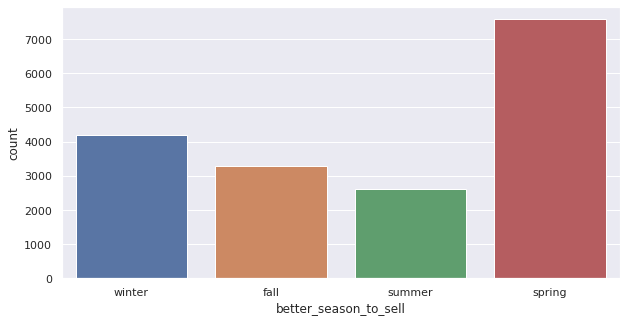

In [28]:
# Melhor estação para venda

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(cat_attributes['better_season_to_sell']);

##### H2. Properties with a price/m2 below 50% of the region's median are in poor condition (1 or 2) (False)

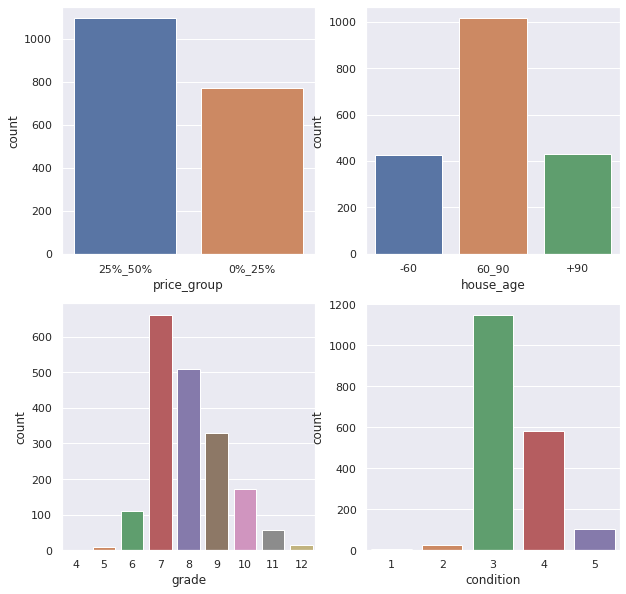

In [54]:
sns.set(rc={'figure.figsize':(10,10)})

aux1 = df4[(df4['price_group'] == '0%_25%') | (df4['price_group'] == '25%_50%')]

# Price Group:
plt.subplot(2, 2, 1)
sns.countplot(aux1['price_group']);

# house_age:
plt.subplot(2, 2, 2)
sns.countplot(aux1['house_age']);

# Grade
plt.subplot(2, 2, 3)
sns.countplot(aux1['grade']);

# condition
plt.subplot(2, 2, 4)
sns.countplot(aux1['condition']);

##### H3. Houses built after 1990 that have a price/m2 below 50% of the median are in poor condition (False)

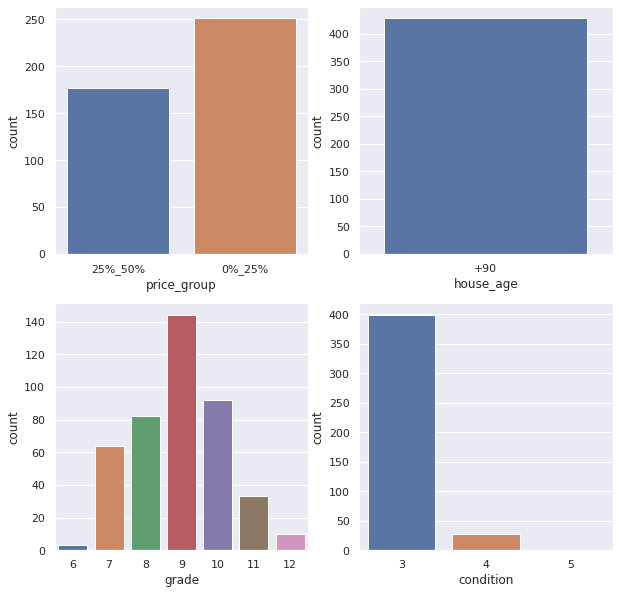

In [58]:
sns.set(rc={'figure.figsize':(10,10)})

aux1 = df4[df4['house_age'] == '+90']
aux2 = aux1[(aux1['price_group'] == '0%_25%') | (aux1['price_group'] == '25%_50%')]

# Price Group:
plt.subplot(2, 2, 1)
sns.countplot(aux2['price_group']);

# house_age:
plt.subplot(2, 2, 2)
sns.countplot(aux2['house_age']);

# Grade
plt.subplot(2, 2, 3)
sns.countplot(aux2['grade']);

# condition
plt.subplot(2, 2, 4)
sns.countplot(aux2['condition']);

##### H4. There are no properties in excellent condition (5) between 50% and 75% of the median (False)

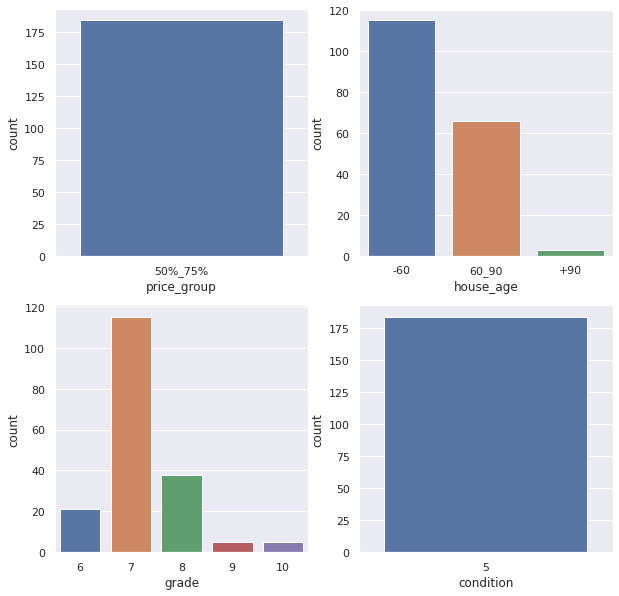

In [69]:
sns.set(rc={'figure.figsize':(10,10)})

aux1 = df4[df4['condition'] == 5]
aux2 = aux1[(aux1['price_group'] == '50%_75%')]

# Price Group:
plt.subplot(2, 2, 1)
sns.countplot(aux2['price_group']);

# house_age:
plt.subplot(2, 2, 2)
sns.countplot(aux2['house_age']);

# Grade
plt.subplot(2, 2, 3)
sns.countplot(aux2['grade']);

# condition
plt.subplot(2, 2, 4)
sns.countplot(aux2['condition']);

##### H5. Houses overlooking the water have prices/m2 above the average for the region (False)

In [62]:
df4['price_group'].value_counts()

over_median    9840
75%_100%       3647
50%_75%        2308
25%_50%        1094
0%_25%          773
Name: price_group, dtype: int64

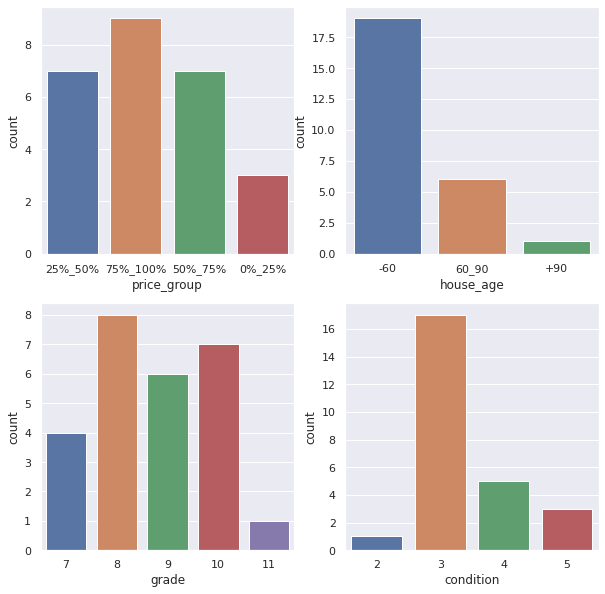

In [63]:
sns.set(rc={'figure.figsize':(10,10)})

aux1 = df4[df4['waterfront'] == 1]
aux2 = aux1[(aux1['price_group'] != 'over_median')]

# Price Group:
plt.subplot(2, 2, 1)
sns.countplot(aux2['price_group']);

# house_age:
plt.subplot(2, 2, 2)
sns.countplot(aux2['house_age']);

# Grade
plt.subplot(2, 2, 3)
sns.countplot(aux2['grade']);

# condition
plt.subplot(2, 2, 4)
sns.countplot(aux2['condition']);

##### H6. There are many new houses (2005+) that are very cheap and well designed. It would be ideal for buying, renovating and reselling (True)

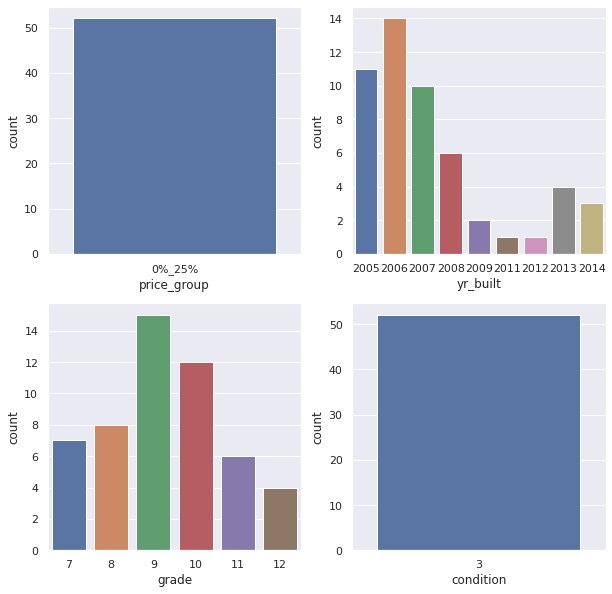

In [67]:
aux1 = df4[df4['yr_built'] >= 2005]
aux2 = aux1[(aux1['price_group'] == '0%_25%')]

# Price Group:
plt.subplot(2, 2, 1)
sns.countplot(aux2['price_group']);

# house_age:
plt.subplot(2, 2, 2)
sns.countplot(aux2['yr_built']);

# Grade
plt.subplot(2, 2, 3)
sns.countplot(aux2['grade']);

# condition
plt.subplot(2, 2, 4)
sns.countplot(aux2['condition']);

##### H7. There was no increase in price/m2 between 2014 and 2015 (False)

In [70]:
price_yr = df4[['price_m2', 'year']].groupby('year').mean().reset_index()
yoy = price_yr.loc[1, 'price_m2'] / price_yr.loc[0, 'price_m2'] -1

print(f'R: the average price growth in the period was {yoy:.1%}.')

R: the average price growth in the period was 3.3%.


##### H8. the month-over-month price variation was always positive during the analyzed period (False)

In [34]:
# Analysis Month over Month

mom = df4[['price_m2','year' ,'month']]
mom = mom[['price_m2', 'year', 'month']].groupby(['year', 'month']).mean().reset_index()
mom['diff'] = mom['price_m2'].diff()
mom['MoM (%)'] = mom['price_m2'].pct_change()*100
mom

,year,month,price_m2,diff,MoM (%)
0,2014,5,1054.77,NaN,NaN
1,2014,6,1007.87,-46.90,-4.45
2,2014,7,1012.42,4.55,0.45
3,2014,8,987.74,-24.68,-2.44
4,2014,9,1003.62,15.88,1.61
5,2014,10,1048.65,45.03,4.49
6,2014,11,1017.03,-31.62,-3.02
7,2014,12,997.35,-19.69,-1.94
8,2015,1,969.95,-27.39,-2.75
9,2015,2,1018.36,48.41,4.99


##### H9. Water view properties are larger and more expensive (True)

In [72]:
price_wf = df4[['waterfront', 'price_m2']].groupby('waterfront').mean().reset_index()
price_wf = price_wf.loc[1, 'price_m2'] / price_wf.loc[0, 'price_m2'] -1
print(f'Properties overlooking the water are {price_wf:.1%} more expensive than others.')

wf_1 = df4[df4['waterfront'] == 1]['m2_lot'].mean()
wf_0 = df4[df4['waterfront'] == 0]['m2_lot'].mean()
rate_wf = wf_1 / wf_0 -1
print(f'Properties overlooking the water are, on average, {rate_wf:.1%} higher than others')

Properties overlooking the water are 36.2% more expensive than others.
Properties overlooking the water are, on average, 62.8% higher than others


##### H10. Homes built after the year 2000 are smaller and more expensive (True)

In [73]:
mean_2000 = df4[df4['yr_built'] >= 2000] ['m2_lot']. mean()
mean_1900 = df4[df4['yr_built'] < 2000] ['m2_lot']. mean()
ratio_sqft2000 = 1- mean_2000 / mean_1900
print(f'Properties built after the 2000s are on average {ratio_sqft2000:.1%} smaller than the others.')

price_1900 = df4[df4['yr_built'] < 2000] ['price_m2']. mean()
price_2000 = df4[df4['yr_built'] >= 2000] ['price_m2']. mean()
ratio_price2000 = price_2000 / price_1900 -1
print(f'Properties built after the 2000s are on average {ratio_price2000:.1%} more expensive than others.')

Properties built after the 2000s are on average 29.1% smaller than the others.
Properties built after the 2000s are on average 131.1% more expensive than others.


##### H11. Properties without a basement have a total area 40% larger than properties with a basement (False) 

In [74]:
without_basement = df4[(df4['m2_basement'] == 0)]['m2_lot'].mean()
with_basement = df4[(df4['m2_basement'] > 0)] ['m2_lot'].mean()
rate_basement = without_basement / with_basement -1
print(f'R: Properties without a basement have an average area of {rate_basement:.1%} greater than properties with a basement.')


R: Properties without a basement have an average area of 27.3% greater than properties with a basement.


##### H12. Is it worth buying real estate in bad condition (1, 2) to renovate and resell (True) 

In [77]:

condition = df4[['price_m2', 'condition']].groupby('condition').mean().reset_index()

mean_bad = condition[(condition['condition'] <=2)]['price_m2'].mean()
mean_good = condition[(condition['condition'] > 2 ) & (condition['condition'] < 5)]['price_m2'].mean()
mean_great = condition[(condition['condition'] == 5)]['price_m2'].mean()

ratio_bad_good = 1- mean_bad / mean_good 
ratio_bad_great = 1- mean_bad / mean_great

print(f'R: The price/m2 of houses in bad condition (1, 2) are on average {ratio_bad_good:.1%} cheaper than properties in good condition (3, 4) and are {ratio_bad_great:.1%} cheaper than properties in excellent conditions (5).')


# Imóveis que foram reformados e estão em boas condições (3, 4) são mais caros que os não reformados nas mesmas condições.
condition3_4 = df4[(df4['condition'] == 3) | (df4['condition'] == 4)] [['price_m2', 'yr_renovated', 'condition']]

not_renovated = condition3_4[(condition3_4['yr_renovated'] == 0)].mean()
renovated = condition3_4[(condition3_4['yr_renovated'] != 0)].mean()

ratio3_4 = renovated['price_m2'] / not_renovated['price_m2'] -1

print(f'R: Renovated properties in good condition (3, 4) are on average {ratio3_4:.1%} more expensive than properties in the same condition that have not been renovated.')

R: The price/m2 of houses in bad condition (1, 2) are on average 49.2% cheaper than properties in good condition (3, 4) and are 55.9% cheaper than properties in excellent conditions (5).
R: Renovated properties in good condition (3, 4) are on average 18.4% more expensive than properties in the same condition that have not been renovated.


##### H13. properties built before 1955 are 50% cheaper on average, making them attractive to buy, renovate and resell (False)

In [78]:
# Mediana de preço dos imoveis construidos depois de 1955
over_55 = df4[(df4['yr_built'] > 1955)]['price_m2'].mean()
under_55 = df4[(df4['yr_built'] <= 1955)]['price_m2'].mean()
ratio_price55 = under_55 / over_55 -1
print(f'R: Properties built before 1955 are on average {ratio_price55:.1%} cheaper.')

R: Properties built before 1955 are on average 23.4% cheaper.


# 5. Business Solution

### 5.1 Sugestão de Compra

#### 5.1.1 House Groups

##### **Grupo 1:** Houses with low prices and good conditions
* Price/m2: abaixo de 50% da mediana
* Yr_build: depois de 1990
* Condition: >=4
* Grade: >=7

In [40]:
df5 = df4.copy()

In [41]:
# Grupo 1: 
aux1 = df5[(df5['price_group'] == '0%_25%') | (df5['price_group'] == '25%_50%')]
aux2 = aux1[aux1['yr_built'] >= 1990]
aux3 = aux2[aux2['condition'] >= 4]
group_1 = aux3[aux3['grade'] >= 7]

print(group_1['price'].sum())
print(group_1['id'].count())

24837650.0
37


##### **Grupo 2:** Older houses, but in excellent condition.
* Price/m2: entre 50% e 75% da mediana
* Yr_build: casas construídas entre 1960 e 1990
* Condition: = 5
* Grade: >=7

In [42]:
# Grupo 2: 
aux1 = df5[(df5['price_group'] == '50%_75%')]
aux2 = aux1[aux1['yr_built'] >= 1960]
aux3 = aux2[aux2['condition'] == 5]
group_2 = aux3[aux3['grade'] >= 7]

print(group_2['price'].sum())
print(group_2['id'].count())

32958100.0
72


##### **Grupo 3:** New and very cheap houses. To buy, renovate and sell.
* Price/m2: below 25% of the regional median
* Yr_build: built from 2005
* Condition: less then or equal to 3
* Grade: greater then 8

In [43]:
# Grupo 3: 
aux1 = df5[(df5['price_group'] == '0%_25%')]
aux2 = aux1[aux1['yr_built'] >= 2005]
aux3 = aux2[aux2['condition'] <=3 ]
group_3 = aux3[aux3['grade'] > 7]

print(group_3['price'].sum())
print(group_3['id'].count())

42771450.0
45


##### **Grupo 4:** Cheap houses, with sea views and in good condition.
* Price/m2: less than 75% of the region median 
* Yr_build: no filter
* Condition: greater than or equal to 3
* Grade: greater than 7

In [44]:
# Grupo 4: 
aux1 = df5[(df5['price_group'] != 'over_median') & (df5['price_group'] != '50%_75%')]
aux2 = aux1[aux1['waterfront'] == 1]
aux3 = aux2[aux2['condition'] >=3 ]
group_4 = aux3[aux3['grade'] > 7]

print(group_4['price'].sum())
print(group_4['id'].count())

22262250.0
15


#### 5.1.2 List Overview

In [45]:
# Concat list

group_1['house_group'] = 'group_1'
group_2['house_group'] = 'group_2'
group_3['house_group'] = 'group_3'
group_4['house_group'] = 'group_4'

suggestion_list = pd.concat ([group_1, group_2, group_3, group_4])
suggestion_list.sort_values('house_group')

print('- Number of Houses Selected: {}'.format(suggestion_list['id'].count()))
print('- Investiment: {}'.format(suggestion_list['price'].sum()))

- Number of Houses Selected: 169
- Investiment: 122829450.0


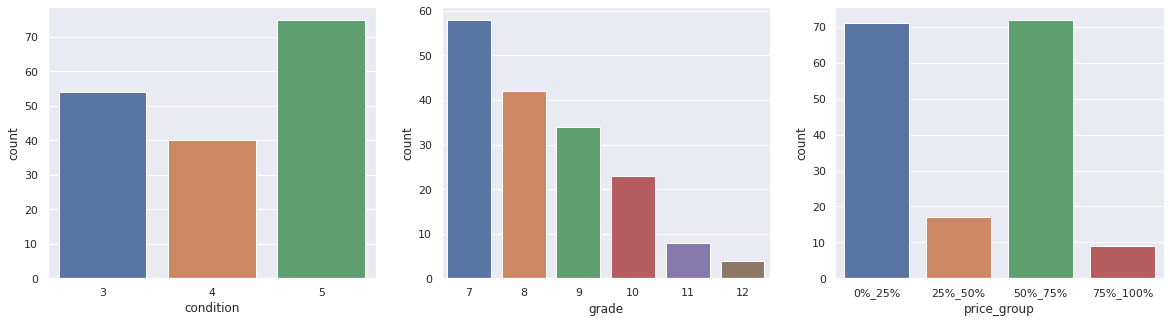

In [46]:
# Overview

sns.set(rc={'figure.figsize':(20,5)})

# Condition:
plt.subplot(1, 3, 1)
sns.countplot(suggestion_list['condition']);

# Grade:
plt.subplot(1, 3, 2)
sns.countplot(suggestion_list['grade']);

# dormitory_type
plt.subplot(1, 3, 3)
sns.countplot(suggestion_list['price_group']);

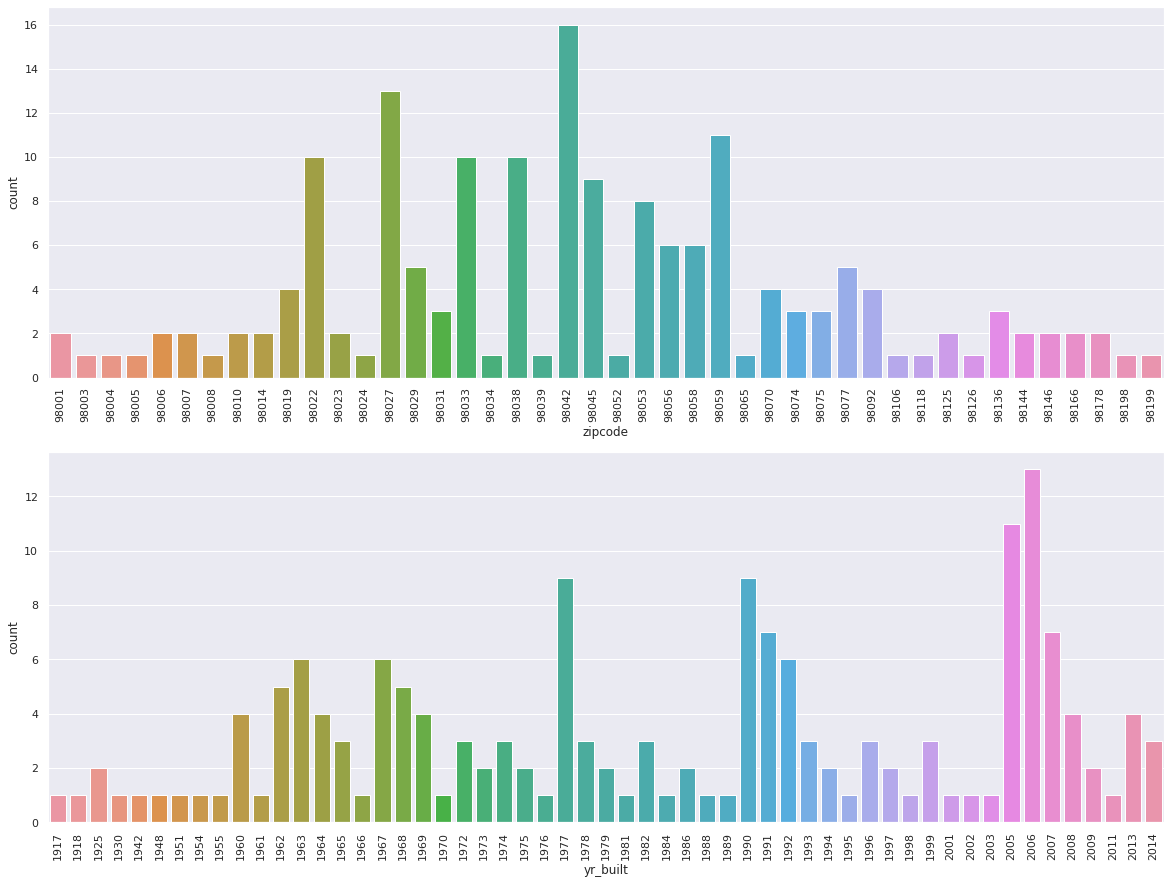

In [47]:
sns.set(rc={'figure.figsize':(20,15)})

plt.subplot(2, 1, 1)
sns.countplot(suggestion_list['zipcode']);
plt.xticks (rotation=90);

plt.subplot(2, 1, 2)
sns.countplot(suggestion_list['yr_built']);
plt.xticks (rotation=90);


In [48]:
investment = suggestion_list['price'].sum()
profit = suggestion_list['sale_price'].sum()

roi = (profit / investment -1)*100

roi

55.88500966177086

In [49]:
suggestion_list.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'month', 'year', 'season', 'm2_lot', 'm2_living',
       'm2_above', 'm2_basement', 'price_m2', 'median_price_m2_zipcode',
       'dormitory_type', 'price_group', 'house_age', 'better_season_to_sell',
       'sale_price', 'roi_%', 'house_group'],
      dtype='object')

In [50]:
suggestion_list.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,m2_basement,price_m2,median_price_m2_zipcode,dormitory_type,price_group,house_age,better_season_to_sell,sale_price,roi_%,house_group
1665,7322910030,2014-07-21,1095000.00,5,3.50,2,0,0,4,9,...,0.00,206.55,854.48,mansion,0%_25%,60_90,winter,1971000.00,80.00,group_1
1713,2954400520,2015-04-30,1237500.00,4,3.25,2,0,0,4,10,...,0.00,266.75,854.48,house,25%_50%,+90,winter,1856250.00,50.00,group_1
1787,525069099,2014-10-22,685000.00,3,2.50,2,0,0,4,8,...,0.00,33.52,854.48,house,0%_25%,+90,winter,1233000.00,80.00,group_1
3218,2723069129,2015-05-06,427000.00,3,2.50,2,0,0,4,8,...,0.00,42.38,524.45,house,0%_25%,60_90,summer,768600.00,80.00,group_1
3272,2025700730,2014-05-02,287200.00,3,3.00,1,0,0,4,7,...,70.61,154.83,524.45,house,25%_50%,+90,summer,430800.00,50.00,group_1


In [51]:
# Converting the suggestion list to CSV file

suggestion_list.to_csv('../data/suggestion_list.csv', index = False)

In [52]:
sl = pd.read_csv('../data/suggestion_list.csv')

In [53]:
sl.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,m2_basement,price_m2,median_price_m2_zipcode,dormitory_type,price_group,house_age,better_season_to_sell,sale_price,roi_%,house_group
0,7322910030,2014-07-21,1095000.00,5,3.50,2,0,0,4,9,...,0.00,206.55,854.48,mansion,0%_25%,60_90,winter,1971000.00,80.00,group_1
1,2954400520,2015-04-30,1237500.00,4,3.25,2,0,0,4,10,...,0.00,266.75,854.48,house,25%_50%,+90,winter,1856250.00,50.00,group_1
2,525069099,2014-10-22,685000.00,3,2.50,2,0,0,4,8,...,0.00,33.52,854.48,house,0%_25%,+90,winter,1233000.00,80.00,group_1
3,2723069129,2015-05-06,427000.00,3,2.50,2,0,0,4,8,...,0.00,42.38,524.45,house,0%_25%,60_90,summer,768600.00,80.00,group_1
4,2025700730,2014-05-02,287200.00,3,3.00,1,0,0,4,7,...,70.61,154.83,524.45,house,25%_50%,+90,summer,430800.00,50.00,group_1
